# Adventure Works Cycles Customer Analysis

## Initial Data Exploration

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

In this project, we will handle three main tasks:

* Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
* Build a regression model to predict customer purchasing behavior.

The data consists of three files.

AdvWorksCusts.csv
Customer demographic data consisting of the following fields:

* CustomerID (integer): A unique customer identifier.
* Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
* FirstName (string): The customer's first name.
* MiddleName (string): The customer's middle name.
* LastName (string): The customer's last name.
* Suffix (string): A suffix for the customer name (Jr, Sr, etc.)
* AddressLine1 (string): The first line of the customer's home address.
* AddressLine2 (string): The second line of the customer's home address.
* City (string): The city where the customer lives.
* StateProvince (string): The state or province where the customer lives.
* CountryRegion (string): The country or region where the customer lives.
* PostalCode (string): The postal code for the customer's address.
* PhoneNumber (string): The customer's telephone number.
* BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.
* Education (string): The maximum level of education achieved by the customer:
* Partial High School
* High School
* Partial College
* Bachelors
* Graduate Degree
* Occupation (string): The type of job in which the customer is employed:
       Manual
       Skilled Manual
       Clerical
       Management
       Professional
* Gender (string): The customer's gender (for example, M for male, F for female, etc.)
* MaritalStatus (string): Whether the customer is married (M) or single (S).
* HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).
* NumberCarsOwned (integer): The number of cars owned by the customer.
* NumberChildrenAtHome (integer): The number of children the customer has who live at home.
* TotalChildren (integer): The total number of children the customer has.
* YearlyIncome (decimal): The annual income of the customer.

AW_AveMonthSpend.csv
Sales data for existing customers, consisting of the following fields:

* CustomerID (integer): The unique identifier for the customer.
* AveMonthSpend (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

AW_BikeBuyer.csv
Sales data for existing customers, consisting of the following fields:

* CustomerID (integer): The unique identifier for the customer.
* BikeBuyer (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

In [1]:
# Import the modules we need for the specified tasks

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Exploring The Data

In [2]:
# Read the files into a pandas dataframe

adventure_works = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AdvWorksCusts.csv")
aw_avmonthspend = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AW_AveMonthSpend.csv")
aw_bikebuyer = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AW_BikeBuyer.csv")

## Identify Quality Issues

In [3]:
# Inspect the first five elements of adventure_works

adventure_works.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


### Missing Values

In [4]:
# Get more informations about adventure_works

adventure_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

We see that columns like **Title**, **MiddleName**, **Suffix** and **AddressLine2** contain a lot of missing values. Therefore we can remove these columns. They certainly don't add much value to our analysis.

### Statistical Measurements

In [5]:
adventure_works.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


### Duplicates

In [6]:
# Identify duplicates. We consider rows with identical first_name, last_name and birthdate as duplicates.
# We keep the most recent version

print("The duplicates to remove are: ")
print("-------------------------------")

adventure_works[adventure_works.duplicated(subset=['FirstName', 'LastName', 'BirthDate'], keep='last')].sort_values(axis=0, by='FirstName')

The duplicates to remove are: 
-------------------------------


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
3393,29333,NaN,Abby,NaN,Martinez,NaN,1023 Hawkins Street,NaN,Townsville,Queensland,...,1937-09-10,Bachelors,Management,F,S,0,2,0,2,58892
4463,18719,NaN,Alberto,G,Suarez,NaN,7289 Las Quebrados Ln,NaN,Rhodes,New South Wales,...,1964-10-20,Bachelors,Professional,M,M,1,3,4,4,106313
8081,20021,NaN,Alexander,I,Jones,NaN,5805 Nob Hill Drive,NaN,Haney,British Columbia,...,1965-06-28,Bachelors,Skilled Manual,M,M,1,0,4,4,118085
7221,20202,NaN,Alexandra,B,Jones,NaN,4386 Ryan Rd.,NaN,Haney,British Columbia,...,1959-12-02,Graduate Degree,Professional,F,M,1,3,5,5,90140
2057,13289,NaN,Alexandria,C,Coleman,NaN,6652 Birch Park Rd,NaN,Cliffside,British Columbia,...,1962-02-26,Partial College,Professional,F,M,1,3,4,5,81064
6459,26767,NaN,Alisha,C,Goel,NaN,3002 Carmel Drive,NaN,Rhodes,New South Wales,...,1957-10-25,Partial College,Skilled Manual,F,S,0,1,0,1,72107
4230,27046,NaN,Allison,NaN,Howard,NaN,8788 Green Leaf Drive,NaN,Downey,California,...,1958-06-16,Partial College,Clerical,F,M,1,1,0,1,45275
34,11041,NaN,Amanda,M,Carter,NaN,5826 Escobar,NaN,Glendale,California,...,1977-10-16,Partial College,Skilled Manual,F,M,1,2,0,0,78170
251,11279,NaN,Amanda,S,Cook,NaN,4098 Woodcrest Dr.,NaN,Everett,Washington,...,1963-09-12,Partial College,Professional,F,M,1,1,0,0,85754
2989,14328,NaN,Andrea,L,Rogers,NaN,9669 Cynthia Dr.,NaN,Shawnee,British Columbia,...,1976-08-08,High School,Skilled Manual,F,S,0,2,0,0,51443


There are 115 duplicates that we need to remove. From the previous table, we see that there are two rows for the customer *Amanda Cook*.

In [7]:
# Print the entries related to the customer 'Amanda Cook'
print("Entries for the customer 'Amanda Cook'")
print("--------------------------------------")
adventure_works[(adventure_works['FirstName'] == 'Amanda') & (adventure_works['LastName'] == 'Cook')]

Entries for the customer 'Amanda Cook'
--------------------------------------


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
251,11279,NaN,Amanda,S,Cook,NaN,4098 Woodcrest Dr.,NaN,Everett,Washington,...,1963-09-12,Partial College,Professional,F,M,1,1,0,0,85754
252,11279,NaN,Amanda,S,Cook,NaN,9187 Vista Del Sol,NaN,Everett,Washington,...,1963-09-12,Partial College,Professional,F,M,1,1,0,0,86138


The most recent version for this customer is the one with the index **252**. This is the entry we need to keep.

### Correlation Matrix

In [8]:
adventure_works.corr()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
CustomerID,1.000000,-0.124498,0.003674,-0.018892,-0.017882,-0.059508
HomeOwnerFlag,-0.124498,1.000000,-0.053983,0.134244,0.186530,0.075304
NumberCarsOwned,0.003674,-0.053983,1.000000,0.424203,0.394732,0.344895
NumberChildrenAtHome,-0.018892,0.134244,0.424203,1.000000,0.647564,0.366679
TotalChildren,-0.017882,0.186530,0.394732,0.647564,1.000000,0.362652
YearlyIncome,-0.059508,0.075304,0.344895,0.366679,0.362652,1.000000


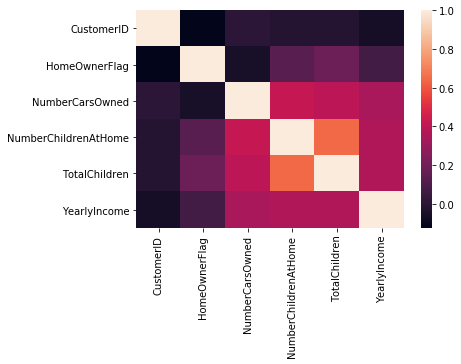

In [9]:
import seaborn as sns

sns.heatmap(adventure_works.corr())

In [10]:
# Print the first elements of aw_avmonthspend
aw_avmonthspend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [11]:
# Get more infos about aw_avmonthspend
aw_avmonthspend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID       16519 non-null int64
AveMonthSpend    16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


The dataframe *aw_avmonthspend* doesn't contain null values. What about the duplicates?

In [12]:
# Print the first elements 
aw_bikebuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [13]:
# Get general infos about the dataframe
aw_bikebuyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID    16519 non-null int64
BikeBuyer     16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


No null values have been identified. Let's check for duplicated values

In [14]:
aw_bikebuyer.duplicated(subset=['CustomerID'], keep = 'last').value_counts()

False    16404
True       115
dtype: int64

There are **115** duplicated values. We will remove them.

### Data Visualization

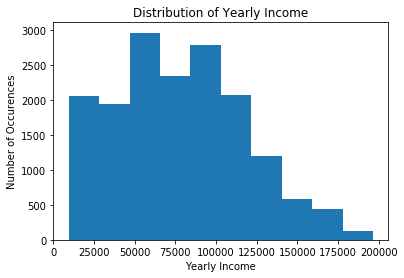

In [15]:
plt.hist(adventure_works['YearlyIncome'])
plt.xlabel("Yearly Income")
plt.ylabel("Number of Occurences")
plt.title("Distribution of Yearly Income")
plt.show()